# Gradient descent implementation based on golden-section search

## Needed Libraries import

In [8]:
from helpers import *
import numpy as np
from scipy.optimize import OptimizeResult

## Gradient Descent implementations with golden-section search

### Implementation of golden-section search

In [9]:
def golden_section_search(f, a, b, tol=1e-6, max_iter=1000):
    golden_ratio = (np.sqrt(5) - 1) / 2

    nfev = 1

    x1 = b - golden_ratio * (b - a)
    x2 = a + golden_ratio * (b - a)
    f1 = f(x1)
    f2 = f(x2)

    nfev += 2

    for nit in range(max_iter):
        if f1 > f2:
            a = x1
            x1 = x2
            f1 = f2
            x2 = a + golden_ratio * (b - a)
            f2 = f(x2)
            nfev += 1
        else:
            b = x2
            x2 = x1
            f2 = f1
            x1 = b - golden_ratio * (b - a)
            f1 = f(x1)
            nfev += 1

        if abs(b - a) < tol:
            break

    x_min = (a + b) / 2
    nfev += 1

    result = OptimizeResult(
        x=x_min,
        nfev=nfev
    )

    return result

### Gradient descent based of previously implemented line search

In [10]:
def gd_gs(f, grad_f, x0, tol=1e-6, max_iter=1000):
    x = np.array(x0, dtype=float)

    nit = 0
    nfev = 1
    x_history = [x.copy()]

    for nit in range(max_iter):
        g = grad_f(x)

        if np.linalg.norm(g) < tol:
            break

        def f_along_line(alpha):
            return f(x + alpha * -g)

        alpha_result = golden_section_search(f_along_line, 0, 1.0)
        alpha = alpha_result.x
        nfev += alpha_result.nfev

        x_new = x + alpha * -g
        x_history.append(x_new.copy())

        if np.linalg.norm(x_new - x) < tol:
            x = x_new
            nfev += 1
            break

        x = x_new
        nfev += 1

    fun = f(x)

    result = OptimizeResult(
        x=x,
        fun=fun,
        nfev=nfev,
        njev=nit + 1,
        nit=nit + 1,
        x_history=np.array(x_history)
    )

    return result

### Extraction for reuse

In [11]:
# !jupyter nbconvert --to python GD_GSS.ipynb

## Results

### Symmetrical parabola: $(x - 3)^2 + (y + 2)^2$

Method: gd_gs
Initial point: [-5, 3]
Real minimum: [3, -2]
Method          Found point          f(x)       Iterations      Evals        Error     
------------------------------------------------------------------------------------------
Stat            (3.000, -2.000)       0.000         3             72         0.000000  


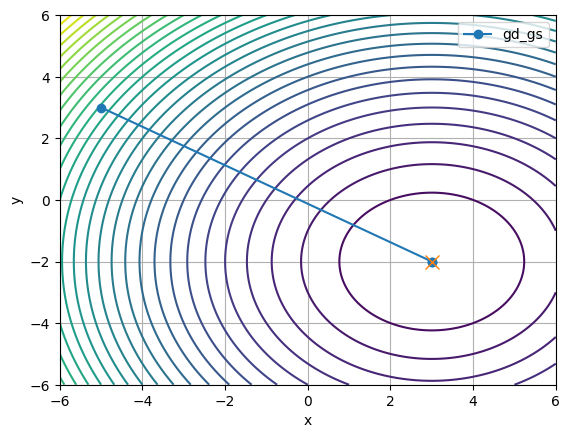

In [12]:
print_output([-5, 3], gd_gs, func_sp, grad_sp, [3, -2])

### Rotated elliptical function: $2(x + 2)^2 + 4xy + 3(y - 4)^2$

Method: gd_gs
Initial point: [-3, -25]
Real minimum: [-18, 16]
Method          Found point          f(x)       Iterations      Evals        Error     
------------------------------------------------------------------------------------------
Stat            (-18.000, 16.000)       -208.000      20            701        0.000001  


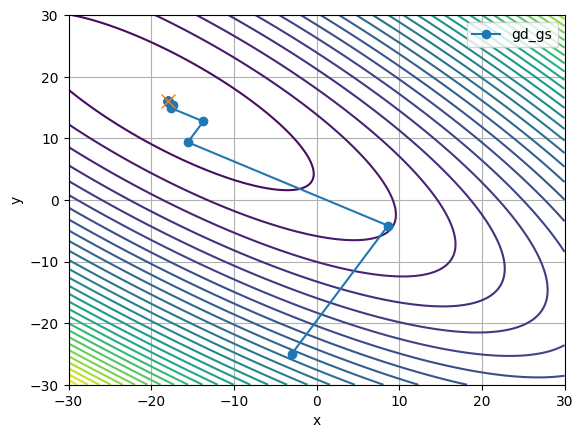

In [13]:
print_output([-3, -25], gd_gs, func_re, grad_re, [-18, 16], grid=[-30, 30])

### Elliptical function with scale: $8(x - 3)^2 + (y + 1)^2$

Method: gd_gs
Initial point: [-5, 3]
Real minimum: [3, -1]
Method          Found point          f(x)       Iterations      Evals        Error     
------------------------------------------------------------------------------------------
Stat            (3.000, -1.000)       0.000         10            351        0.000000  


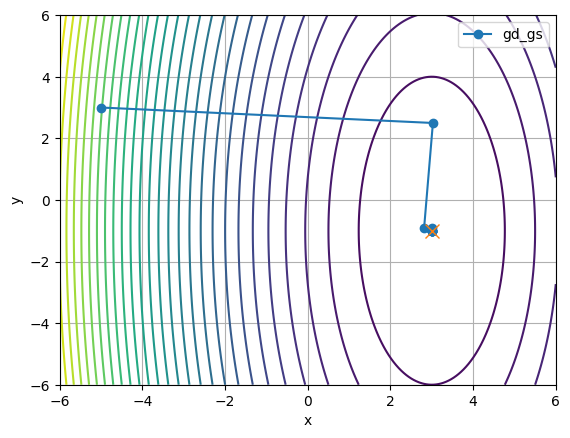

In [14]:
print_output([-5, 3], gd_gs, func_es, grad_es, [3, -1])